In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt

In [9]:
balance_sheet_df = pd.read_excel('../data/Balance_Sheet.xlsx')
income_statement_df = pd.read_excel('../data/Income_Statement.xlsx')

In [10]:
balance_sheet_df.head()

,Unnamed: 0,Year,comp_type,company,Accounts Payable,Cash,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liab,Total Stockholder Equity
0,0,2019,tech,AAPL,46236000000,48844000000,4.106000e+09,37378000000,5.171300e+10,338516000000,162819000000,105718000000,248028000000,90488000000
1,1,2020,tech,AAPL,42296000000,38016000000,4.061000e+09,45336000000,5.292700e+10,323888000000,143713000000,105392000000,258549000000,65339000000
2,2,2021,tech,AAPL,54763000000,34940000000,6.580000e+09,49527000000,2.769900e+10,351002000000,134836000000,125481000000,287912000000,63090000000
3,3,2022,tech,AAPL,64115000000,23646000000,4.946000e+09,84234000000,2.465800e+10,352755000000,135405000000,153982000000,302083000000,50672000000
4,4,2019,tech,MSFT,9382000000,11356000000,2.063000e+09,43856000000,1.224760e+11,286556000000,175552000000,69420000000,184226000000,102330000000


In [11]:
income_statement_df.head()

,Unnamed: 0,Year,comp_type,company,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue
0,0,2019,tech,AAPL,161782000000,98392000000,63930000000,196244000000,260174000000
1,1,2020,tech,AAPL,169559000000,104956000000,66288000000,208227000000,274515000000
2,2,2021,tech,AAPL,212981000000,152836000000,108949000000,256868000000,365817000000
3,3,2022,tech,AAPL,223546000000,170782000000,119437000000,274891000000,394328000000
4,4,2019,tech,MSFT,42910000000,82933000000,42959000000,82884000000,125843000000


In [12]:
# Merging the two dataset

df_ratios = pd.merge(balance_sheet_df, income_statement_df, on=['Year', 'company', 'comp_type'])
df_ratios.head()

,Unnamed: 0_x,Year,comp_type,company,Accounts Payable,Cash,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,Total Current Assets,Total Current Liabilities,Total Liab,Total Stockholder Equity,Unnamed: 0_y,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue
0,0,2019,tech,AAPL,46236000000,48844000000,4.106000e+09,37378000000,5.171300e+10,338516000000,162819000000,105718000000,248028000000,90488000000,0,161782000000,98392000000,63930000000,196244000000,260174000000
1,1,2020,tech,AAPL,42296000000,38016000000,4.061000e+09,45336000000,5.292700e+10,323888000000,143713000000,105392000000,258549000000,65339000000,1,169559000000,104956000000,66288000000,208227000000,274515000000
2,2,2021,tech,AAPL,54763000000,34940000000,6.580000e+09,49527000000,2.769900e+10,351002000000,134836000000,125481000000,287912000000,63090000000,2,212981000000,152836000000,108949000000,256868000000,365817000000
3,3,2022,tech,AAPL,64115000000,23646000000,4.946000e+09,84234000000,2.465800e+10,352755000000,135405000000,153982000000,302083000000,50672000000,3,223546000000,170782000000,119437000000,274891000000,394328000000
4,4,2019,tech,MSFT,9382000000,11356000000,2.063000e+09,43856000000,1.224760e+11,286556000000,175552000000,69420000000,184226000000,102330000000,4,42910000000,82933000000,42959000000,82884000000,125843000000


In [13]:
# Computing the ratios
df_ratios['leverage_ratio'] = df_ratios["Total Assets"]/df_ratios["Total Stockholder Equity"]
df_ratios['profitability_ratio'] = df_ratios['Operating Income'] / df_ratios['Total Revenue']

df_ratios.head()

,Unnamed: 0_x,Year,comp_type,company,Accounts Payable,Cash,Inventory,Property Plant Equipment,Short Term Investments,Total Assets,...,Total Liab,Total Stockholder Equity,Unnamed: 0_y,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue,leverage_ratio,profitability_ratio
0,0,2019,tech,AAPL,46236000000,48844000000,4.106000e+09,37378000000,5.171300e+10,338516000000,...,248028000000,90488000000,0,161782000000,98392000000,63930000000,196244000000,260174000000,3.741004,0.245720
1,1,2020,tech,AAPL,42296000000,38016000000,4.061000e+09,45336000000,5.292700e+10,323888000000,...,258549000000,65339000000,1,169559000000,104956000000,66288000000,208227000000,274515000000,4.957039,0.241473
2,2,2021,tech,AAPL,54763000000,34940000000,6.580000e+09,49527000000,2.769900e+10,351002000000,...,287912000000,63090000000,2,212981000000,152836000000,108949000000,256868000000,365817000000,5.563512,0.297824
3,3,2022,tech,AAPL,64115000000,23646000000,4.946000e+09,84234000000,2.465800e+10,352755000000,...,302083000000,50672000000,3,223546000000,170782000000,119437000000,274891000000,394328000000,6.961537,0.302887
4,4,2019,tech,MSFT,9382000000,11356000000,2.063000e+09,43856000000,1.224760e+11,286556000000,...,184226000000,102330000000,4,42910000000,82933000000,42959000000,82884000000,125843000000,2.800313,0.341370


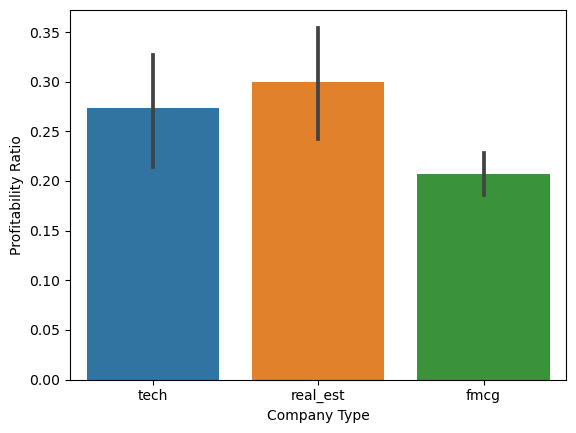

In [14]:
# Finding the company type with the lowest profitability ratio
import seaborn as sns

sns.barplot(x='comp_type', y='profitability_ratio', data=df_ratios)
plt.xlabel('Company Type')
plt.ylabel('Profitability Ratio')

plt.savefig('Profitability_Ratio.png', format='png')

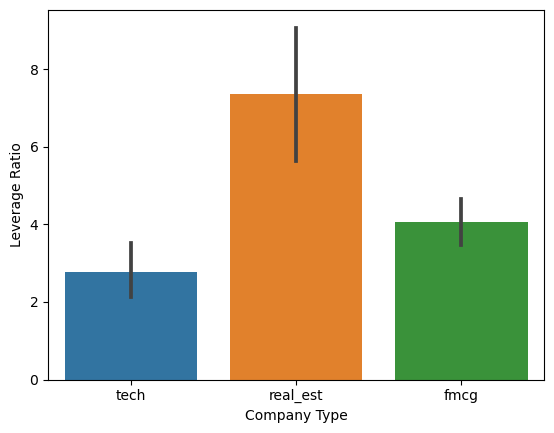

In [15]:
# Finding the company type with the highest leverage ratio

sns.barplot(x='comp_type', y='leverage_ratio', data=df_ratios)
plt.xlabel('Company Type')
plt.ylabel('Leverage Ratio')

plt.savefig('Leverage Ratio.png', format='png')

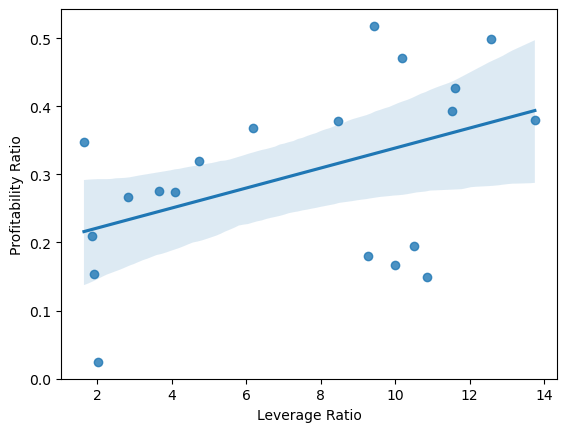

In [16]:
# Relationship between leverage and profitability in the real estate companies
real_est_df = df_ratios[df_ratios['comp_type'] == 'real_est']

sns.regplot(data=real_est_df, x='leverage_ratio', y='profitability_ratio')
plt.xlabel('Leverage Ratio')
plt.ylabel('Profitability Ratio')

plt.savefig('relationship leverage and profitability.png', format='png')

# Trend Analysis

###  The Goal of the trend analysis is to observe how the leverage ratio and profitability ratio have changed over the years for different companies. We can visualize these trends using line plots for better clarity.

In [17]:
# Data Preparation
import matplotlib.pyplot as plt

# Convert 'Year' to a categorical type for better plotting
df_ratios['Year'] = df_ratios['Year'].astype(str)
# Sort the DataFrame by the 'Year' column
df_ratios = df_ratios.sort_values(by='Year')

# Check for missing values
print(f"Missing year records: \n{df_ratios.groupby('comp_type')['Year'].unique()}")

# Set the plot style
sns.set(style="whitegrid", palette='muted')

Missing year records: 
comp_type
fmcg        [2018, 2019, 2020, 2021, 2022]
real_est          [2018, 2019, 2020, 2021]
tech        [2018, 2019, 2020, 2021, 2022]
Name: Year, dtype: object


In [18]:
# Filter data for 2018-2021
df_filtered = df_ratios[df_ratios['Year'].isin(['2018','2019', '2020', '2021'])]

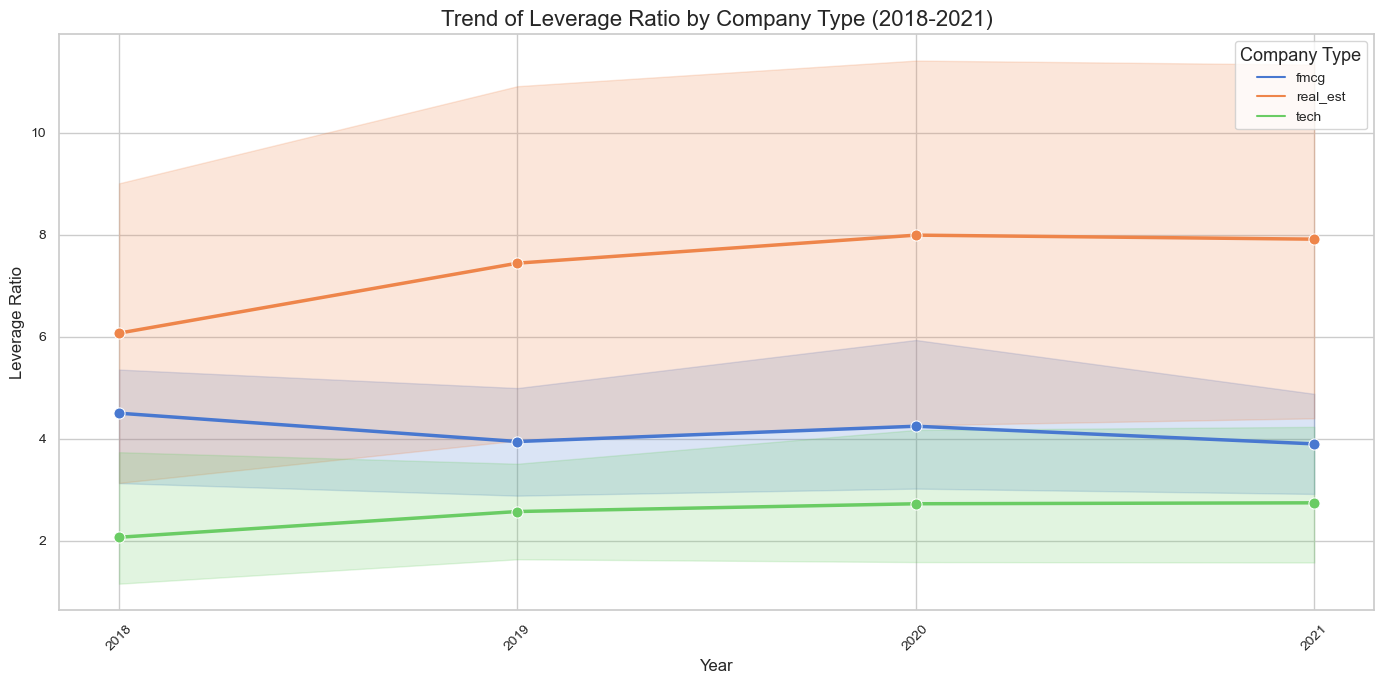

In [19]:
# Plotting Leverage Ratio Trend (2018-2021)
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_filtered, x='Year', y='leverage_ratio', hue='comp_type', marker='o', linewidth=2.5, markersize=8)

# Customizing the plot appearance
plt.title('Trend of Leverage Ratio by Company Type (2018-2021)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Leverage Ratio', fontsize=12)
plt.legend(title='Company Type', fontsize=10, title_fontsize='13')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('Leverage_Ratio_Trend_2018_2021.png', format='png')

plt.show()

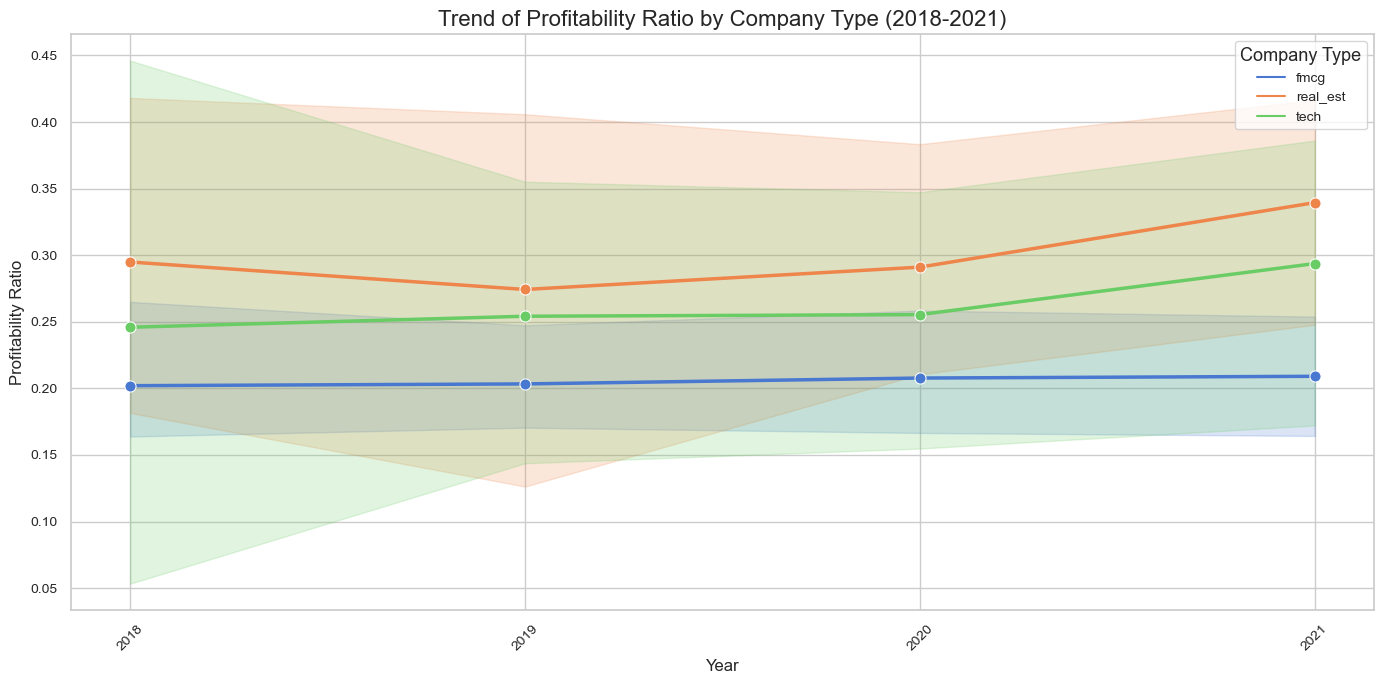

In [20]:
# Plotting Profitability Ratio Trend (2018-2021)
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_filtered, x='Year', y='profitability_ratio', hue='comp_type', marker='o', linewidth=2.5, markersize=8)

# Customizing the plot appearance
plt.title('Trend of Profitability Ratio by Company Type (2018-2021)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Profitability Ratio', fontsize=12)
plt.legend(title='Company Type', fontsize=10, title_fontsize='13')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('Profitability_Ratio_Trend_2018_2021.png', format='png')

plt.show()

# Comparative Analysis Across Industries

### For this analysis, we will compare the average leverage and profitability ratios across different company types.

In [21]:
# Calculate Average Ratios for 2018-2021
avg_ratios_filtered = df_filtered.groupby('comp_type')[['leverage_ratio', 'profitability_ratio']].mean().reset_index()


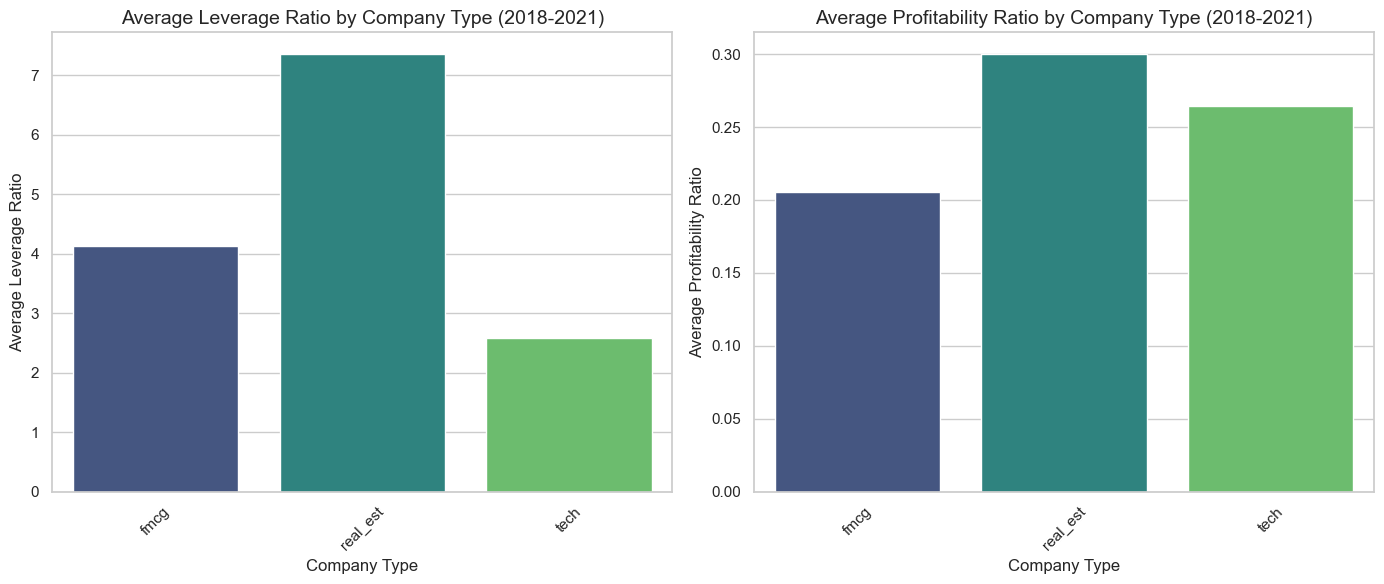

In [22]:
# Comparative Analysis Plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot average leverage ratio by company type
sns.barplot(data=avg_ratios_filtered, x='comp_type', y='leverage_ratio', ax=axes[0], palette='viridis')
axes[0].set_title('Average Leverage Ratio by Company Type (2018-2021)', fontsize=14)
axes[0].set_xlabel('Company Type', fontsize=12)
axes[0].set_ylabel('Average Leverage Ratio', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Plot average profitability ratio by company type
sns.barplot(data=avg_ratios_filtered, x='comp_type', y='profitability_ratio', ax=axes[1], palette='viridis')
axes[1].set_title('Average Profitability Ratio by Company Type (2018-2021)', fontsize=14)
axes[1].set_xlabel('Company Type', fontsize=12)
axes[1].set_ylabel('Average Profitability Ratio', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

# Save the comparative analysis plot
plt.savefig('Comparative_Analysis_2018_2021.png', format='png')

plt.show()